In [3]:
# from google.colab import files
# files.upload()  # Upload kaggle.json

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle competitions download -c playground-series-s5e8

In [4]:
# !unzip /content/playground-series-s5e8.zip -d /content/playground-series-s5e8

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
# test_df = pd.read_csv('data/test.csv')
# test_df.head()

In [7]:
# sub_df = pd.read_csv('data/sample_submission.csv')
# sub_df.head()

In [8]:
df = pd.read_csv('/content/playground-series-s5e8/train.csv')
df.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
5,5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
6,6,39,blue-collar,married,secondary,no,0,no,no,telephone,21,nov,90,1,-1,0,unknown,0
7,7,50,admin.,single,secondary,no,1595,no,no,telephone,31,jul,49,25,-1,0,unknown,0
8,8,46,blue-collar,married,primary,no,1463,no,no,cellular,4,aug,50,1,-1,0,unknown,0
9,9,39,management,divorced,tertiary,no,25,yes,no,cellular,8,may,119,1,-1,0,unknown,0


In [9]:
df.shape

(750000, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [11]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [12]:
for col in df.select_dtypes('object').columns:
  print(f'{col}: {df[col].unique()}')

job: ['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'primary' 'tertiary' 'unknown']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
month: ['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']
poutcome: ['unknown' 'other' 'failure' 'success']


In [13]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [14]:
df1 = df.drop(['id'], axis=1)

In [15]:
df1.shape

(750000, 17)

In [16]:
bank_df = pd.read_csv('/content/bank-full.csv',sep=';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
bank_df.shape

(45211, 17)

In [18]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
bank_df['y'] = bank_df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [20]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [21]:
df1 = pd.concat([df1, bank_df], ignore_index=True)

In [22]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [23]:
df1.shape

(795211, 17)

## ML pipeline notes to apply to test

1. was_previously_contacted = (pdays != -1)
2.

In [24]:
df1['was_previously_contacted'] = df1['pdays'].apply(lambda x:1 if x != -1 else 0).astype("int8")

In [25]:
all_cols = set(df1.columns)-set('y')
all_cols.__len__()

17

In [26]:
def plot_feature_vs_target(df, feature_col, target_col='y'):
    plt.figure(figsize=(15, 6))

    if pd.api.types.is_numeric_dtype(df[feature_col]):
        sns.histplot(data=df, x=feature_col, hue=target_col, kde=True)
    else:
        sns.countplot(data=df, x=feature_col, hue=target_col)
        plt.xticks(rotation=45)

    plt.title(f"{feature_col} vs {target_col}")
    plt.tight_layout()
    plt.show()

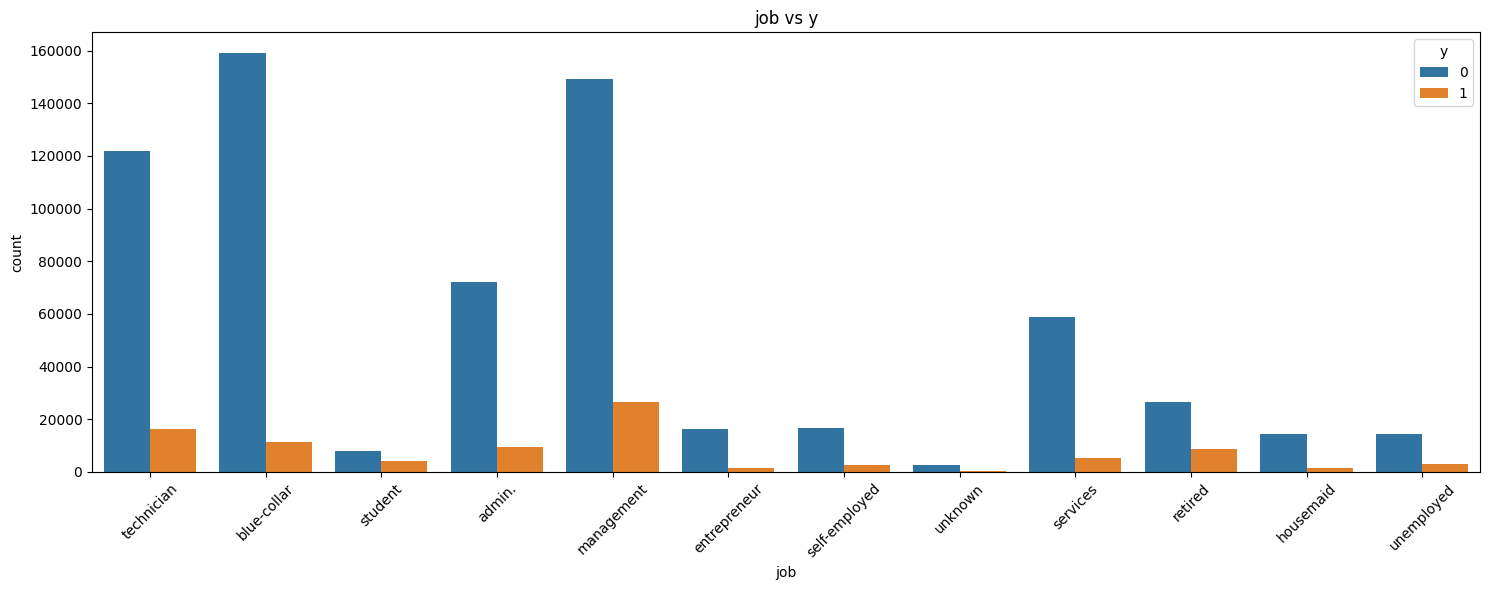

In [27]:
plot_feature_vs_target(df, 'job')

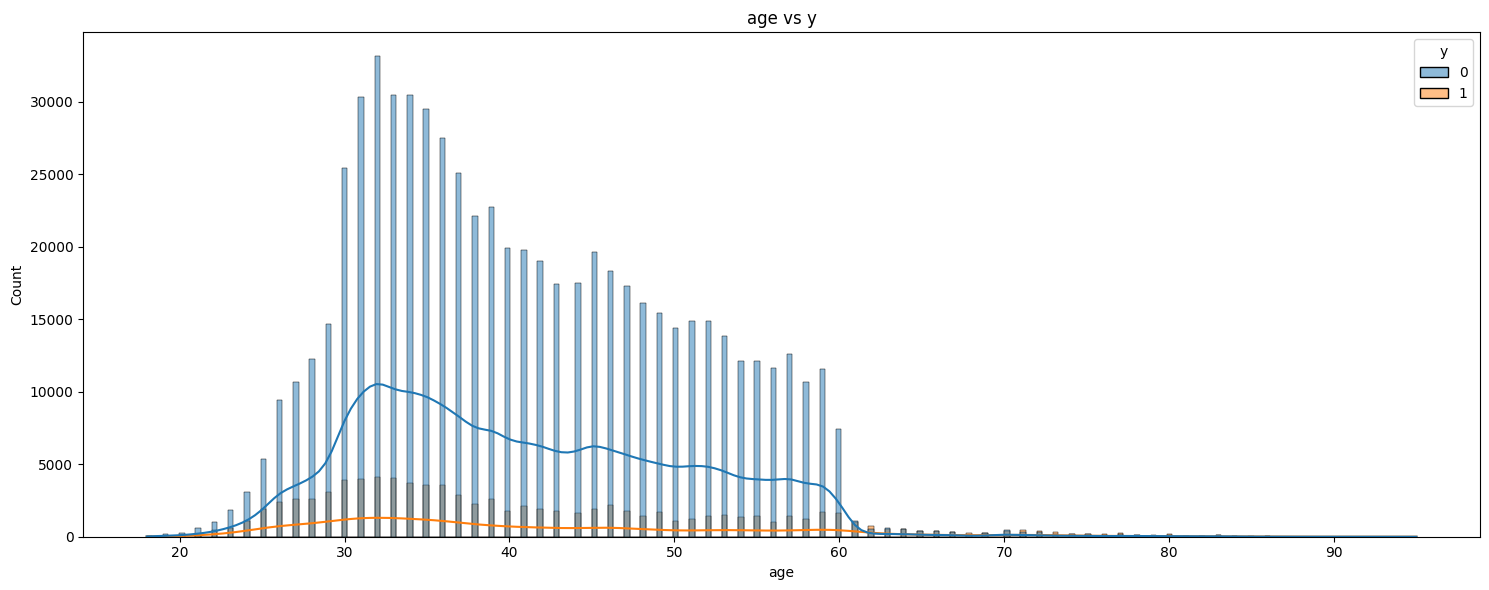

In [28]:
plot_feature_vs_target(df, 'age')

In [29]:
all_cols

{'age',
 'balance',
 'campaign',
 'contact',
 'day',
 'default',
 'duration',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'pdays',
 'poutcome',
 'previous',
 'was_previously_contacted'}

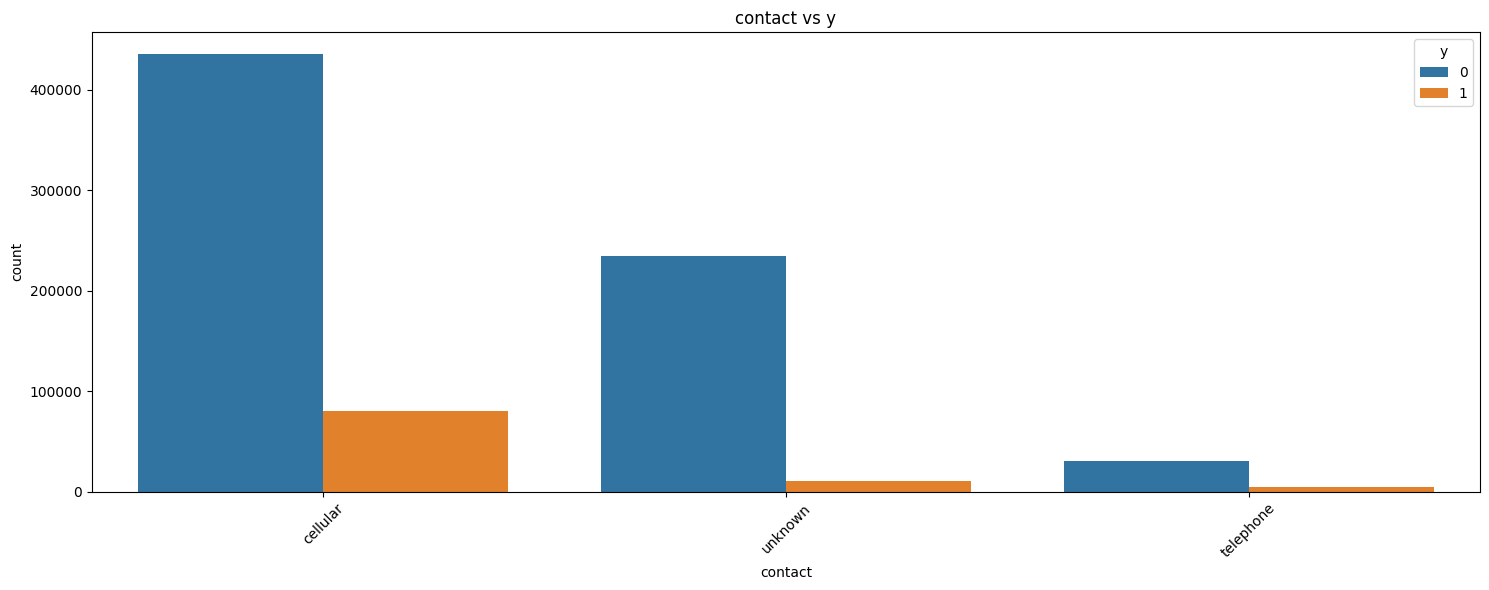

In [30]:
plot_feature_vs_target(df1, 'contact')

In [31]:
for col in df1.columns:
    print(col,' - ', df1[col].dtype)

age  -  int64
job  -  object
marital  -  object
education  -  object
default  -  object
balance  -  int64
housing  -  object
loan  -  object
contact  -  object
day  -  int64
month  -  object
duration  -  int64
campaign  -  int64
pdays  -  int64
previous  -  int64
poutcome  -  object
y  -  int64
was_previously_contacted  -  int8


<Axes: ylabel='campaign'>

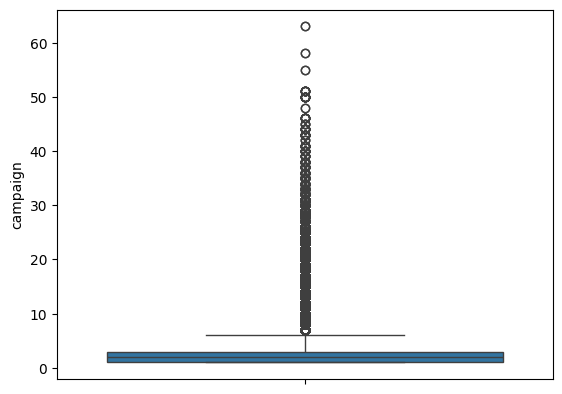

In [32]:
sns.boxplot(df1['campaign'])

In [33]:
def findIQR(col, df):
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    condition = (df[col] >= q25) & (df[col] <= q75)
    filtered = df[condition]
    print(f"{col} -> mid 50% shape: {filtered.shape}, original: {df.shape}")

In [34]:
for col in df1.columns:
    if pd.api.types.is_integer_dtype(df1[col]):
        print('col name - ', col)
        findIQR(col, df1)
        print()

col name -  age
age -> mid 50% shape: (414864, 18), original: (795211, 18)

col name -  balance
balance -> mid 50% shape: (488009, 18), original: (795211, 18)

col name -  day
day -> mid 50% shape: (404046, 18), original: (795211, 18)

col name -  duration
duration -> mid 50% shape: (401498, 18), original: (795211, 18)

col name -  campaign
campaign -> mid 50% shape: (638568, 18), original: (795211, 18)

col name -  pdays
pdays -> mid 50% shape: (709388, 18), original: (795211, 18)

col name -  previous
previous -> mid 50% shape: (709385, 18), original: (795211, 18)

col name -  y
y -> mid 50% shape: (699434, 18), original: (795211, 18)

col name -  was_previously_contacted
was_previously_contacted -> mid 50% shape: (709388, 18), original: (795211, 18)



In [35]:
# job_dummy = pd.get_dummies(df1['job'])
# job_dummy.head()

In [36]:
# for col in set(job_dummy.columns[:-1]):
#     df1[col] = job_dummy[col]
#     print(col, ' - completed', df1.shape)

In [37]:
# def ohe(data:pd.DataFrame, col:str) -> pd.DataFrame:
#     data = data.copy()
#     col_dummy = pd.get_dummies(data[col])
#     print('data shape before - ',data.shape,' categorical cols in ', col, ' - ', col_dummy.shape)
#     for col in col_dummy.columns[:-1]:
#         data[col] = col_dummy[col]
#     print('dataframe size after - ', data.shape)
#     return data

In [38]:
# df2 = ohe(df1, 'marital')

In [39]:
df1.select_dtypes(include='object').columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [40]:
df2 = df1.copy()

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

target_col = 'y'
cat_cols = df2.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

X = df2.drop(columns=[target_col])
y = df2[target_col]

X_transformed = model.fit_transform(X)

ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)

non_cat_cols = [col for col in X.columns if col not in cat_cols]

all_feature_names = list(cat_feature_names) + non_cat_cols

X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names, index=X.index)

In [42]:
# df3.shape

In [43]:
preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=cat_cols)

array(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'], dtype=object)

In [44]:
X = X_transformed_df
y = df2['y']

In [45]:
X.shape

(795211, 43)

In [46]:
# for col in df2.select_dtypes(include='object').columns.tolist():
#     df2 = ohe(df2, col)

In [47]:
# df3 = df2.drop(df2.select_dtypes(include='object').columns.tolist(), axis=1)

In [48]:
# df3.shape

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor,XGBClassifier

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
xgb_params = {
    'learning_rate': 0.1951339614286697,
    'max_depth': 13,
    'min_child_weight': 14,
    'gamma': 4.586254878038162,
    'subsample': 0.8829082972307842,
    'colsample_bytree': 0.6106352277501341,
    'lambda': 9.976935506747019,
    'alpha': 0.0018063487584367348,
    'scale_pos_weight': 3.6963430205760193,
    'objective': 'binary:logistic',
    'use_label_encoder': False,
    'n_jobs': -1,
    'random_state': 42,
    'tree_method': 'gpu_hist'
}

In [52]:
xgb_model = XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)
print("Test R² Score:", xgb_model.score(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:04:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:04:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:2676: UserWarning: [04:04:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:

Test R² Score: 0.9170727413341047


In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

np.float64(0.9662387514622308)

In [55]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 24.5 MB/s eta 0:00:00


In [56]:
import optuna

In [57]:
study = optuna.create_study(direction='maximize')

[I 2025-08-06 04:04:58,926] A new study created in memory with name: no-name-3db63451-3382-4f9d-902c-e1af37474708


In [62]:
from catboost import CatBoostClassifier

In [67]:
def objective(trial):
  param = {
      "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
      "depth": trial.suggest_int("depth", 10, 15),
      # "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
      "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
      "bootstrap_type": trial.suggest_categorical(
          "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
      ),
      "task_type": "GPU",
      "iterations": 200,
      "eval_metric": "AUC",
  }
  if param["bootstrap_type"] == "Bayesian":
      param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
  elif param["bootstrap_type"] == "Bernoulli":
      param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

  train_x, valid_x, train_y, valid_y = train_test_split(
      X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
  )

  model = CatBoostClassifier(**param)
  model.fit(train_x, train_y, eval_set=[(valid_x, valid_y)],early_stopping_rounds=50, verbose=0)

  preds_proba = model.predict_proba(valid_x)[:, 1]

  auc = roc_auc_score(valid_y, preds_proba)

  return auc

In [68]:
study.optimize(objective, n_trials=50)

Default metric period is 5 because AUC is/are not implemented for GPU
[I 2025-08-06 04:12:22,874] Trial 2 finished with value: 0.9625606695239464 and parameters: {'objective': 'Logloss', 'depth': 12, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.7668530651906962}. Best is trial 2 with value: 0.9625606695239464.
Default metric period is 5 because AUC is/are not implemented for GPU
[I 2025-08-06 04:12:49,885] Trial 3 finished with value: 0.9546900832219506 and parameters: {'objective': 'CrossEntropy', 'depth': 13, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 4.896777063710374}. Best is trial 2 with value: 0.9625606695239464.
Default metric period is 5 because AUC is/are not implemented for GPU
[I 2025-08-06 04:21:51,746] Trial 4 finished with value: 0.9625664976429308 and parameters: {'objective': 'Logloss', 'depth': 13, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9861315659597361}. Best is trial 

KeyboardInterrupt: 

In [ ]:
study.best_trial

In [ ]:
study.best_params

In [ ]:
study.best_value

In [61]:
# !pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
# from catboost import CatBoostClassifier

In [ ]:
cat_params = {
    'learning_rate': 0.1951339614286697,
    'depth': 13,
    'min_data_in_leaf': 14,
    'l2_leaf_reg': 9.976935506747019,
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.8829082972307842,
    'rsm': 0.6106352277501341,
    'class_weights': [1, 3.6963430205760193],
    'loss_function': 'Logloss',
    'verbose': False,
    'thread_count': -1,
    'random_seed': 42,
}

In [ ]:
model_cb = CatBoostClassifier()

In [ ]:
model_cb.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True,
    # early_stopping_rounds=50
)

In [ ]:
model_cb.best_score_

In [ ]:
model_cb.score(X_test, y_test)

In [ ]:
y_pred_proba = model_cb.predict_proba(X_test)[:, 1]
# y_pred = (y_pred_proba >= 0.5).astype(int)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score


In [ ]:
# print("LR:", roc_auc_score(y_test, LogisticRegression().fit(X_train, y_train).predict_proba(X_test)[:, 1]))
# print("RF:", roc_auc_score(y_test, RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)[:, 1]))
# print("SVC:", roc_auc_score(y_test, SVC(probability=True).fit(X_train, y_train).predict_proba(X_test)[:, 1]))
# print("XGB:", roc_auc_score(y_test, XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train).predict_proba(X_test)[:, 1]))


In [ ]:
test_df = pd.read_csv('/content/playground-series-s5e8/test.csv')
test_df.head()

In [ ]:
test_df['was_previously_contacted'] = test_df['pdays'].apply(lambda x:1 if x != -1 else 0).astype("int8")

In [ ]:
test_df2 = test_df.drop(columns=['id'])

In [ ]:
test_df3 = model.transform(test_df2)

In [ ]:
final_df = pd.DataFrame(test_df3, columns=all_feature_names, index=test_df2.index)

In [ ]:
final_df.head()

In [ ]:
model_cb.predict(final_df)

In [ ]:
submission_df = pd.DataFrame({
    'id':test_df['id'],
    'y':xgb_model.predict(final_df)
})

In [ ]:
submission_df.head()

In [ ]:
# submission_df.to_csv('submission.csv',index=False)

## At end download the orignal dataset and then test the model on that